In [1]:
#Василиса Дёмина
#импорт модулей
import os
import re

from cltk.stem.lemma import LemmaReplacer
from cltk.stem.latin.j_v import JVReplacer
from cltk.tokenize.word import WordTokenizer
from cltk.utils.frequency import Frequency

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#задаем нужные классы
lemmatizer = LemmaReplacer('latin') 
jv_replacer = JVReplacer()
word_tokenizer = WordTokenizer('latin')
freq = Frequency()

In [3]:
prose = 'prose'
prose_lemmas = [] #создаем массив лемм из прозы

for f in os.listdir(prose):
     with open(os.path.join(prose, f), 'r', encoding='utf-8') as file: #открываем нужную папку
            text_jv_replaced = jv_replacer.replace(file.read().lower()) # меняем j на v, делаем все буквы строчными
            prose_tokens = word_tokenizer.tokenize(text_jv_replaced) #токинизируем текст
            prose_tokens = [token for token in prose_tokens if re.match('[A-z0-9]+$', token) and not re.search('\\\\', token)] #удаляем знаки препинания
            prose_lemmas.extend(lemmatizer.lemmatize(prose_tokens)) #добавляем к другим текстам

prose_lemmas_set = set(prose_lemmas) #высчитываем количество лемм в прозе
print('Кол-во лемм в прозе:', len(prose_lemmas_set))
print('Примеры лемм из прозы:', ', '.join(list(prose_lemmas_set)[:7]))

Кол-во лемм в прозе: 12880
Примеры лемм из прозы: corinthiarius, quamlibet, firmano, piscina, ephesiam, publi, theraeo


In [4]:
prose_most_freq = {} #создаем множество самых частотных лексем в прозе
prose_freq_limit = 3500

prose_lemmas_freq = freq.counter_from_str(' '.join(prose_lemmas)) #считаем частотность слов

for lemma in prose_lemmas_freq:
    if prose_lemmas_freq[lemma] > prose_freq_limit:
        prose_most_freq[lemma] = prose_lemmas_freq[lemma] #если частотность выше prose_freq_limit, добавляем в массив

print('Наиболее частотные лексемы в прозе:\n')
print('Лексема', 'Кол-во упоминаний', '\n', sep='\t')
for lemma in sorted(prose_most_freq, key = lambda x: prose_most_freq[x], reverse = True): # строим таблицу
    print(lemma, prose_most_freq[lemma], sep='\t')

Наиболее частотные лексемы в прозе:

Лексема	Кол-во упоминаний	

qui1	9040
et	6362
in	5309
edo1	4193
sum1	3748


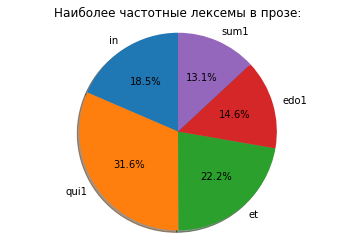

In [5]:
freq_sizes_prose = [] #массив размеров итоговых столбцов
freq_labels_prose = [] #массив названий итоговых столбцв

for lemma_freq in prose_most_freq: 
    freq_labels_prose.append(lemma_freq)
    freq_sizes_prose.append(prose_most_freq[lemma_freq])

fig1, ax1 = plt.subplots() #создаем круговую диаграмму
ax1.pie(freq_sizes_prose, labels=freq_labels_prose, autopct='%1.1f%%', shadow=True, startangle=90) #задаем размеры
ax1.axis('equal')
ax1.set(title='Наиболее частотные лексемы в прозе:')

plt.show()

In [6]:
poetry = 'poetry'
poetry_lemmas = [] #создаем массив для лексем в поэзии

for f in os.listdir(poetry):
     with open(os.path.join(poetry, f), 'r', encoding ='utf-8') as file: #открываем папку с поэзией
            text_jv_replaced = jv_replacer.replace(file.read().lower()) #заменяем j на v
            poetry_tokens = word_tokenizer.tokenize(text_jv_replaced) #токинизируем текст
            poetry_tokens = [token for token in poetry_tokens if re.match('[A-z0-9]+$', token)] # убираем все знаки препинания
            poetry_lemmas.extend(lemmatizer.lemmatize(poetry_tokens)) # добавляем к другим текстам 

poetry_lemmas_set = set(poetry_lemmas) #считаем количество лексем в поэзии
print('Кол-во лемм в поэзии:', len(poetry_lemmas_set))
print('Примеры лемм из поэзии:', ', '.join(list(poetry_lemmas_set)[:7]))

Кол-во лемм в поэзии: 16119
Примеры лемм из поэзии: tmolo, quamlibet, pieriae, scutica, gaetulus, sabinas, colchidas


In [12]:
poetry_most_freq = {} #создаем множество самых частотных лексем в поэзии
poetry_freq_limit = 3500

poetry_lemmas_freq = freq.counter_from_str(' '.join(poetry_lemmas)) #считаем частотность слов

for lemma in poetry_lemmas_freq:
    if poetry_lemmas_freq[lemma] > poetry_freq_limit:
        poetry_most_freq[lemma] = poetry_lemmas_freq[lemma] #если частотность выше poetry_freq_limit, добавляем в массив

print('Наиболее частотные лексемы в поэзии:\n')
print('Лексема', 'Кол-во упоминаний', '\n', sep='\t')
for lemma in sorted(poetry_most_freq, key = lambda x: poetry_most_freq[x], reverse = True): #формируем таблицу
    print(lemma, poetry_most_freq[lemma], sep='\t')

Наиболее частотные лексемы в поэзии:

Лексема	Кол-во упоминаний	

que	20143
et	10911
qui1	7453
in	5040
hic	3949
edo1	3663


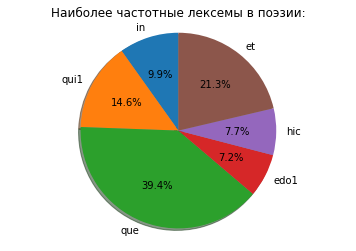

In [17]:
freq_sizes_poetry = [] #создаем массив размеров итоговых столбцов 
freq_labels_poetry = [] #создаем массив названий итоговых столбцов

for lemma_freq in poetry_most_freq: 
    freq_labels_poetry.append(lemma_freq) 
    freq_sizes_poetry.append(poetry_most_freq[lemma_freq]) 

fig2, ax2 = plt.subplots() #создаем круговую диаграмму 
ax2.pie(freq_sizes_poetry, labels=freq_labels_poetry, autopct='%1.1f%%', shadow=True, startangle=90) #задаем размеры 
ax2.axis('equal')
ax2.set(title='Наиболее частотные лексемы в поэзии:')
plt.show()

In [8]:
poetry_uniq_lemmas = {} #создаем множество лексем в поэзии, которые не встречаются в прозе
poetry_uniq_limit = 150
2
for lemma in poetry_lemmas_freq:
    if not prose_lemmas_freq[lemma] and poetry_lemmas_freq[lemma] > poetry_uniq_limit:
        poetry_uniq_lemmas[lemma] = poetry_lemmas_freq[lemma] #если частотность выше poetry_uniq_limit, то добавляем в массив

print('Наиболее частотные лексемы в поэзии, которые не встречаются в прозе:\n')
print('Лексема', 'Кол-во упоминаний', '\n', sep='\t')
for lemma in sorted(poetry_uniq_lemmas, key = lambda x: poetry_uniq_lemmas[x], reverse = True): #составляем таблицу
    print(lemma, poetry_uniq_lemmas[lemma], sep='\t')

Наиболее частотные лексемы в поэзии, которые не встречаются в прозе:

Лексема	Кол-во упоминаний	

unda	269
aequor	254
ensis	203
aether	194
letum	154


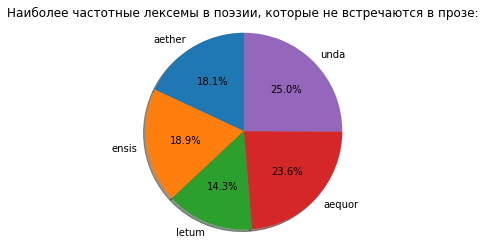

In [9]:
g_sizes_poetry = [] #создаем массив размеров итоговых столбцов
g_labels_poetry = [] #создаем массив названий итоговых столбцов

for lemma_freq in poetry_uniq_lemmas:
    g_labels_poetry.append(lemma_freq)
    g_sizes_poetry.append(poetry_uniq_lemmas[lemma_freq])

fig3, ax3 = plt.subplots() #создаем круговую диаграмму
ax3.pie(g_sizes_poetry, labels=g_labels_poetry, autopct='%1.1f%%', shadow=True, startangle=90) #задаем размеры
ax3.axis('equal')
ax3.set(title='Наиболее частотные лексемы в поэзии, которые не встречаются в прозе:')

plt.show()

In [10]:
prose_uniq_lemmas = {} #создаем множество лексем в прозе, которые не встречаются в поэзии
prose_uniq_limit = 150

for lemma in prose_lemmas_freq:
    if not poetry_lemmas_freq[lemma] and prose_lemmas_freq[lemma] > prose_uniq_limit:
        prose_uniq_lemmas[lemma] = prose_lemmas_freq[lemma] #если частотность выше prose_uniq_limit, то добавляем в массив



print('Наиболее частотные лексемы в прозе, которые не встречаются в поэзии:\n')
print('Лексема', 'Кол-во упоминаний', '\n', sep='\t\t\t')
for lemma in sorted(prose_uniq_lemmas, key = lambda x: prose_uniq_lemmas[x], reverse = True): #составляем таблицу
    print(lemma, prose_uniq_lemmas[lemma], sep='\u0020\u0020\t\t')

Наиболее частотные лексемы в прозе, которые не встречаются в поэзии:

Лексема			Кол-во упоминаний			

publica  		374
civitas  		351
existimo  		181
auctoritas  		175
oratio  		166
arbitror  		152


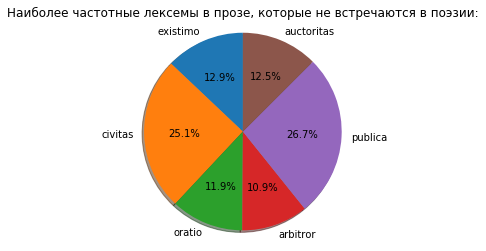

In [11]:
g_sizes_prose = [] #создаем массив размеров итоговых столбцов
g_labels_prose = [] #создаем массив названий итоговых столбцов

for lemma_freq in prose_uniq_lemmas:
    g_labels_prose.append(lemma_freq)
    g_sizes_prose.append(prose_uniq_lemmas[lemma_freq])

fig4, ax4 = plt.subplots() #создаем круговую диаграмму
ax4.pie(g_sizes_prose, labels=g_labels_prose, autopct='%1.1f%%', shadow=True, startangle=90) #задаем размеры
ax4.axis('equal')
ax4.set(title='Наиболее частотные лексемы в прозе, которые не встречаются в поэзии:')

plt.show()